<a href="https://colab.research.google.com/github/adeilsoncardoso/Prova-2/blob/main/atividade_3_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After uploading the file, I will modify the existing cell to read the data from the uploaded file.

In [ ]:
!pip install pandas
!pip install matplotlib

#tem que fazer o upload do arquivo para o colab
from google.colab import files
import pandas as pd
import time # Import time

uploaded = files.upload()

# Check if the file was uploaded
if uploaded:
  for fn in uploaded.keys():
    print('User uploaded file "{name}"'.format(name=fn))
    # Read the uploaded file
    df = pd.read_csv(fn)
    listas_para_analise = {}

    for nome_coluna in df.columns:
        # Use pd.to_numeric with errors='coerce' to turn non-numeric values into NaN
        numeric_series = pd.to_numeric(df[nome_coluna], errors='coerce')
        # Drop NaN values and convert to integers, handling potential non-integer numeric values
        lista_limpa = numeric_series.dropna().astype(int).tolist()
        listas_para_analise[nome_coluna] = lista_limpa

# Agora, 'listas_para_analise' é um dicionário com 4 listas prontoas para o teste

def bubble_sort(lista):
    n = len(lista)
    for i in range(n):
        for j in range(0, n - i - 1):
            if lista[j] > lista[j + 1]:
                lista[j], lista[j + 1] = lista[j + 1], lista[j]
    return lista

# Example of how to use the bubble_sort function with one of the lists:
# sorted_list = bubble_sort(listas_para_analise['coluna1'].copy()) # This line will cause an error because df is not defined yet.
# print(sorted_list)

TypeError: 'NoneType' object is not subscriptable


Tempos coletados:
{'pequena_100': {'selection sort': 0.0003352165222167969, 'bubble sort': 0.0007662773132324219, 'merge sort': 0.0008728504180908203, 'insertion sort': 0.0005939006805419922}, 'media_1000': {'selection sort': 0.04619264602661133, 'bubble sort': 0.10799336433410645, 'merge sort': 0.0037996768951416016, 'insertion sort': 0.06250262260437012}, 'grande_10000': {'selection sort': 8.356468677520752, 'bubble sort': 18.52068591117859, 'merge sort': 0.03600811958312988, 'insertion sort': 5.1496288776397705}, 'muito_grande_50000': {'selection sort': 74.19701766967773, 'bubble sort': 215.76406359672546, 'merge sort': 0.11835098266601562, 'insertion sort': 144.30684351921082}}


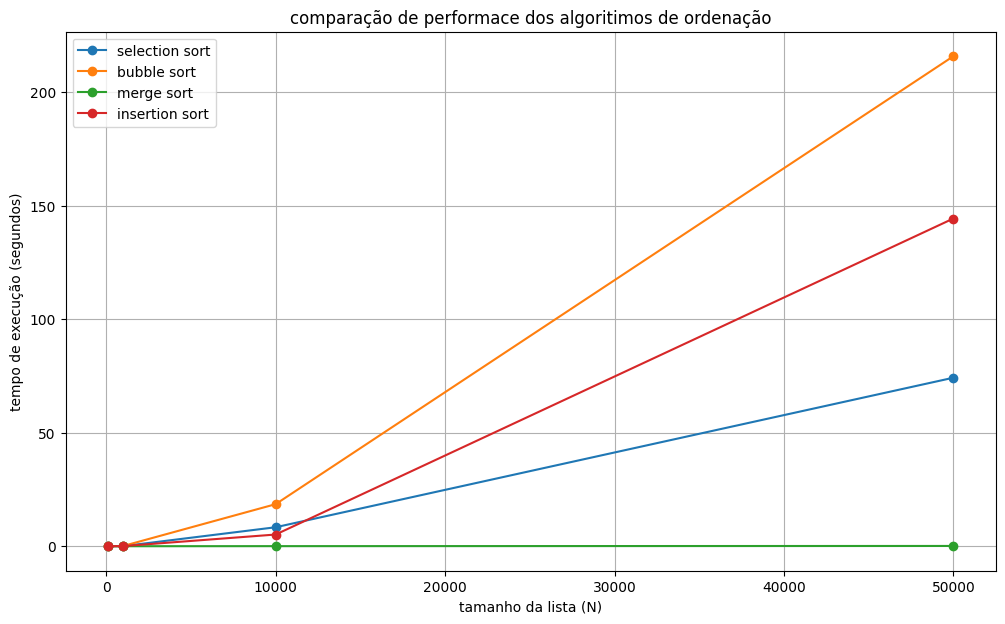

In [ ]:
import time
import matplotlib.pyplot as plt


def selection_sort(lista):
  n = len(lista)
  for i in range(n):
    indice_menor = i
    for j in range(i + 1, n):
      if lista[j] < lista[indice_menor]:
        indice_menor = j
    lista[i], lista[indice_menor] = lista[indice_menor], lista[i]
  return lista

def bubble_sort(lista):
    n = len(lista)
    for i in range(n):
      for j in range(0, n-i-1):
        if lista[j] > lista[j+1]:
          lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista

def merge_sort(lista):
  if len(lista) > 1:
    meio = len(lista) // 2
    esquerda = lista[:meio]
    direita = lista[meio:]

    merge_sort(esquerda)
    merge_sort(direita)

    i = j = k = 0

    while i < len(esquerda) and j < len(direita):
      if esquerda[i] < direita[j]:
        lista[k] = esquerda[i]
        i += 1
      else:
        lista[k] = direita[j]
        j += 1
      k += 1

    while i < len(esquerda):
      lista[k] = esquerda[i]
      i += 1
      k += 1

    while j < len(direita):
      lista[k] = direita[j]
      j += 1
      k += 1
  return lista


def insertion_sort(lista):
  for i in range(1, len(lista)):
    chave = lista[i]
    j = i - 1
    while j >= 0 and chave < lista[j]:
      lista[j + 1] = lista[j]
      j -= 1
    lista[j + 1] = chave
  return lista


listas_para_analise = {
            'pequena_100': list(range(100, 0, -1)),
            'media_1000': list(range(1000, 0, -1)),
            'grande_10000': list(range(10000, 0, -1)),
            'muito_grande_50000': list(range(50000, 0, -1)),
}

tempos_coletados = {}
listas_originais = listas_para_analise  # Get the processed lists

# Add bubble sort to the timing loop
for nome_tamanho, lista_dados in listas_originais.items():
  tempos_coletados[nome_tamanho] = {}

  # Time selection sort
  lista_teste_selection = list(lista_dados)
  inicio_selection = time.time()
  selection_sort(lista_teste_selection)
  fim_selection = time.time()
  tempos_coletados[nome_tamanho]['selection sort'] = fim_selection - inicio_selection


  # Time bubble sort
  lista_teste_bubble = list(lista_dados)
  inicio_bubble = time.time()
  bubble_sort(lista_teste_bubble) # Assuming bubble_sort is defined in the previous cell
  fim_bubble = time.time()
  tempos_coletados[nome_tamanho]['bubble sort'] = fim_bubble - inicio_bubble

  # Time merge sort
  lista_teste_merge = list(lista_dados)
  inicio_merge = time.time()
  merge_sort(lista_teste_merge)
  fim_merge = time.time()
  tempos_coletados[nome_tamanho]['merge sort'] = fim_merge - inicio_merge


  # Time insertion sort
  lista_teste_insertion = list(lista_dados)
  inicio_insertion = time.time()
  insertion_sort(lista_teste_insertion)
  fim_insertion = time.time()
  tempos_coletados[nome_tamanho]['insertion sort'] = fim_insertion - inicio_insertion


print("\nTempos coletados:")
print(tempos_coletados)

# This else block is outside the file upload if statement and will cause an error
# else:
#   print("No file was uploaded.")


tamanhos_n = [100, 1000, 10000, 50000]

# Make sure the keys in tempos_coletados match the order of tamanhos_n
# You can get the keys in a specific order if needed, or sort them.
# Assuming the keys are in the desired order or you will handle mapping
tempos_bubble = [tempos_coletados[key]['bubble sort'] for key in tempos_coletados.keys()]
tempos_selection =  [tempos_coletados[key]['selection sort'] for key in tempos_coletados.keys()]
tempos_merge = [tempos_coletados[key]['merge sort'] for key in tempos_coletados.keys()]
tempos_insertion = [tempos_coletados[key]['insertion sort'] for key in tempos_coletados.keys()]


plt.figure(figsize=(12, 7))
plt.plot(tamanhos_n, tempos_selection, label='selection sort', marker='o')
plt.plot(tamanhos_n, tempos_bubble, label='bubble sort', marker='o') # Add bubble sort to the plot
plt.plot(tamanhos_n, tempos_merge, label='merge sort', marker='o')
plt.plot(tamanhos_n, tempos_insertion, label='insertion sort', marker='o')

plt.xlabel('tamanho da lista (N)')
plt.ylabel('tempo de execução (segundos)')
plt.title('comparação de performace dos algoritimos de ordenação')
plt.legend()
plt.grid(True)
plt.show()

# Nova seção